In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import os 
from os.path import join

In [3]:
abalone_path = join('전복데이터',"abalone.txt")
column_path=join("전복데이터","abalone_attributes.txt")

In [4]:
abalone_columns=list()
for line in open(column_path):
    abalone_columns.append(line.strip())
abalone_columns

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

In [5]:
data=pd.read_csv(abalone_path, header=None,names=abalone_columns)

In [13]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
label=data["Sex"]
del data["Sex"]

In [7]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [29]:
#Scaling
#data=(data-np.min(data))/(np.max(data)-np.min(data))
scaler=MinMaxScaler()
scaler.fit(data)
Mscaled_data=scaler.transform(data)
Mscaled_data

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.1323239 , 0.14798206,
        0.5       ],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06319947, 0.06826109,
        0.21428571],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.18564845, 0.2077728 ,
        0.28571429],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.37788018, 0.30543099,
        0.28571429],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.34298881, 0.29347285,
        0.32142857],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.49506254, 0.49177877,
        0.39285714]])

In [30]:
Mscaled_data=pd.DataFrame(Mscaled_data,columns=data.columns)
Mscaled_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.500000
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.214286
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,0.285714
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.321429
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.214286
...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,0.357143
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,0.321429
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,0.285714
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,0.321429


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros=RandomOverSampler()
rus=RandomUnderSampler()

In [10]:
oversampled_data,oversampled_label=ros.fit_resample(data,label)
undersampled_data,undersampled_label=rus.fit_resample(data,label)

oversampled_data=pd.DataFrame(oversampled_data,columns=data.columns)
undersampled_data=pd.DataFrame(undersampled_data,columns=data.columns)


In [14]:
print("원본데이터의 클래스 비율:\n{}".format(pd.get_dummies(label).sum()))
print("oversample 데이터 클래스 비율\n{}".format(pd.get_dummies(oversampled_label).sum()))
print("undersample 데이커 클래스 비율 \n{}".format(pd.get_dummies(undersampled_label).sum()))

원본데이터의 클래스 비율:
F    1307
I    1342
M    1528
dtype: int64
oversample 데이터 클래스 비율
F    1528
I    1528
M    1528
dtype: int64
undersample 데이커 클래스 비율 
F    1307
I    1307
M    1307
dtype: int64


In [18]:
from sklearn.datasets import make_classification
data,label=make_classification(n_samples=1000,n_features=2,weights=[0.05,0.15,0.8],random_state=2022,n_informative=2,n_repeated=0,n_classes=3,n_clusters_per_class=1,n_redundant=0,class_sep=0.8)

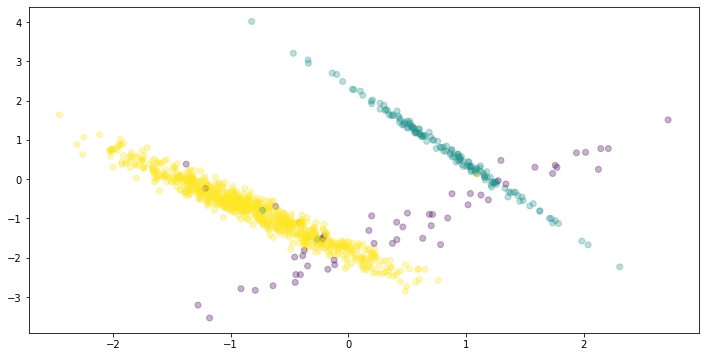

In [24]:
fig=plt.figure(figsize=(12,6))
plt.scatter(data[:,[0]],data[:,1],c=label,alpha=0.3)

In [25]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [27]:
smoted_data,smoted_label=smote.fit_resample(data,label)

print("원본 데이터 비율\n{}".format(pd.get_dummies(label).sum()))
print("\nSMOTE 결과\n{}".format(pd.get_dummies(smoted_label).sum()))

원본 데이터 비율
0     54
1    152
2    794
dtype: int64

SMOTE 결과
0    794
1    794
2    794
dtype: int64


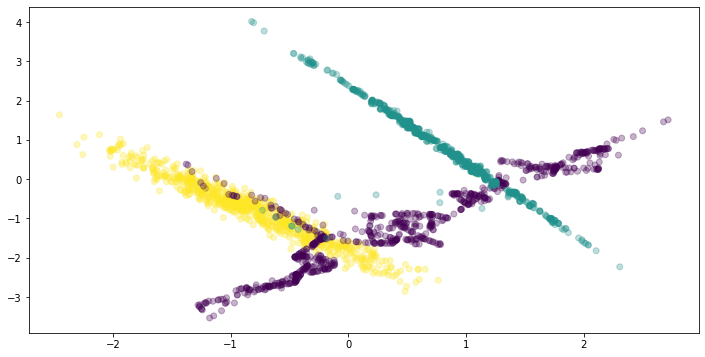

In [28]:
fig=plt.figure(figsize=(12,6))
plt.scatter(smoted_data[:,[0]],smoted_data[:,1],c=smoted_label,alpha=0.3)

In [29]:
#차원축소
from sklearn.datasets import load_digits
digits=load_digits()


In [30]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [31]:
data=digits.data
label=digits.target

In [32]:
data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Label:0


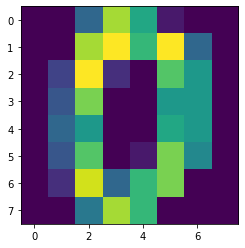

In [35]:
plt.imshow(data[0].reshape(8,8))
print("Label:{}".format(label[0]))

In [38]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [39]:
new_data=pca.fit_transform(data)

In [41]:
print("원본데이터 차원 \n{}".format(data.shape))
print("PCA 데이터 차원 \n{}".format(new_data.shape))

원본데이터 차원 
(1797, 64)
PCA 데이터 차원 
(1797, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


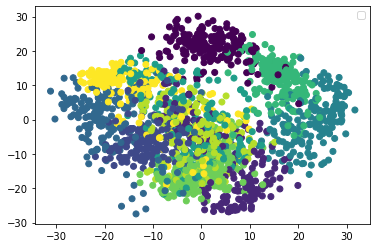

In [42]:
plt.scatter(new_data[:,0],new_data[:,1],c=label)
plt.legend()